#### Выкачивание информации из сообществ
    - Кроме 'is_pinned': 1, 'marked_as_ads': 1
    - Задержки между запросами (иначе бан)
    - Выкачать json-файлы через count и offset – объединять – один файл на одно сообщество, в названии файла - дата скачивания 

С помощью jq – Создать таблицу tsv/csv
    - Id поста
    - Дата YYMMDDDD HH:MM:SS
    - Кол-во лайков
    - Кол-во просмотров
    - Кол-во комментов
    - Кол-во репостов
    - Текст
    - Урл самого большого размера картинки


##### Список мемов-сообществ
    - Какие-то сюрреалистические мемы (https://vk.com/surreal.memes)
    - отчислено (https://vk.com/otchisleno)
    - Юмор Шрёдингера (https://vk.com/humor_schrodinger)
    - блинские фруктовощи (https://vk.com/fruitveg)
    - Как я встретил столбняк (https://vk.com/stlbn)
    - МХК (https://vk.com/mhkon)
    - Мои любимые юморески (https://vk.com/jumoreski)
    - MDK (https://vk.com/mudakoff)
    - низкосортные преколы (https://vk.com/3ddcomics)
    - Приколы из школы (https://vk.com/scolu)
    - Тонкий юмор (https://vk.com/sarsar)
    - Humor pub (https://vk.com/humor__pub)
    - Гулька (https://vk.com/nichoneponimayu)
    - Улетные приколы (https://vk.com/humour.page)
    - мемы без рофла (https://vk.com/not_rofl)
    - School Memes (https://vk.com/school.memy)
    - мемы наоборот (https://vk.com/invertedmemes)
    - Crazy Humor (https://vk.com/crazy_humor1)
    - Чёткие приколы (https://vk.com/ilikes)
    - Четкие приколы (https://vk.com/oroom)
    - Мемы от Джо (несмешной, но для анализа пригодится) (https://vk.com/botjoe)
    - 100500 Мем (https://vk.com/public43208672)
    - Весёлый социопат (https://vk.com/sociopat_ru)
    - Шредингер Шутит (https://vk.com/sh_ring)
    - Рофлы (https://vk.com/r0fl1m)
    - Леонардо Дайвинчик (https://vk.com/dayvinchik)
    - Мембот (https://vk.com/memes_bot)
    - Мемы 2011 (https://vk.com/memsfrom2k11)
    - Memes on Machine Learning for Young Ladies (https://vk.com/weirdreparametrizationtrick)
    - Интеллектуальный юмор (https://vk.com/in.humour)
    - Юмор категории Б (https://vk.com/jokesss)
    - Двач (https://vk.com/4ch_2ch) 

### Подключение библиотек

In [1]:
import time
from datetime import date, datetime as dt
from tqdm import tqdm
import json
import os
import os.path
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import jq
import vk
%matplotlib inline

## Пример

In [2]:
session = vk.Session(access_token='*******') # Сначала надо создать приложение в ВК, от него брать токен и сюда поставить
api = vk.API(session, v='5.131')
api.users.get(user_ids=1)

[{'id': 1,
  'first_name': 'Pavel',
  'last_name': 'Durov',
  'can_access_closed': True,
  'is_closed': False}]

### Получение комментов по id сообщества и id поста

In [3]:
api.wall.getComments(owner_id='-45745333', post_id='45498621')

{'count': 1923,
 'items': [{'id': 45498622,
   'from_id': 0,
   'date': 1620757884,
   'text': '',
   'parents_stack': [],
   'thread': {'count': 7,
    'items': [],
    'can_post': True,
    'show_reply_button': True},
   'deleted': True},
  {'id': 45498626,
   'from_id': 195299178,
   'date': 1620757892,
   'text': '',
   'post_id': 45498621,
   'owner_id': -45745333,
   'parents_stack': [],
   'attachments': [{'type': 'audio',
     'audio': {'artist': 'Linvoid',
      'id': 456243995,
      'owner_id': 2000324412,
      'title': 'Бэнгер',
      'duration': 25,
      'is_explicit': True,
      'is_focus_track': False,
      'track_code': '1f55f49373RUKZuLHc6OVaxQI7UKbEydSrqM1gO1Q4WP0xEYJvLfTAdr71nNPl4wwz1O0GQ',
      'url': 'https://vk.com/mp3/audio_api_unavailable.mp3',
      'date': 1620648332,
      'main_artists': [{'name': 'Linvoid',
        'domain': '387627171845836651',
        'id': '387627171845836651'}],
      'short_videos_allowed': False,
      'stories_allowed': False,


### Получение содержание поста по id (owner+post)

In [3]:
api.wall.getById(posts=['-57846937_16728852'])

[{'id': 16728852,
  'from_id': -57846937,
  'owner_id': -57846937,
  'date': 1506262200,
  'marked_as_ads': 0,
  'post_type': 'post',
  'text': '',
  'attachments': [{'type': 'photo',
    'photo': {'album_id': -7,
     'date': 1506262388,
     'id': 456968949,
     'owner_id': -57846937,
     'access_key': 'dee70933c12511f414',
     'sizes': [{'height': 130,
       'url': 'https://sun1-96.userapi.com/s/v1/if2/vHchf0LNGofMpai6yp5idpTE1RDlWQcZMjBoXpmQ_zu3-wRoxLQ-ihk1hEm-Cj0SqL9YZH5VErzEWXj4yv5HyMq2.jpg?size=104x130&quality=96&type=album',
       'type': 'm',
       'width': 104},
      {'height': 163,
       'url': 'https://sun1-96.userapi.com/s/v1/if2/Kn1cFDnF6OXYnsZNu85k6UZJ8yiMdzb7fwYO-_Wy3lKOAfsjmqU6Ql-Ja0lDsEBg0E34zTKuSbQjN5zNLTMVSj0L.jpg?size=130x163&quality=96&type=album',
       'type': 'o',
       'width': 130},
      {'height': 250,
       'url': 'https://sun1-96.userapi.com/s/v1/if2/W-FDKpcWcAqKH4BNnV1o-dqQccz5rGnVp_9flVn54o4te6vAPyom7L7Sj77LSU-RVoWGpyf4N1GT8GV51MqaMvk1.jpg?si

In [43]:
api.wall.getById(posts=['-91050183_24820901'])[0]['attachments'][0]['type']

'photo'

In [44]:
api.wall.getById(posts=['-91050183_24042616'])[0]['attachments'][0]['type']

'link'

### Список сообществ и количество постов в каждом сообществе

In [3]:
list_communities = ['nichoneponimayu', 'humour.page', 'crazy_humor1', 'ilikes',  'botjoe',  'sociopat_ru', 'sh_ring', 'r0fl1m', 'dayvinchik', 'memes_bot', 'in.humour', 'surreal.memes', 'fruitveg', 'prekoli_blya', 'scolu', 'not_rofl', 'school.memy', 'invertedmemes', 'memsfrom2k11', 'weirdreparametrizationtrick', 'otchisleno', 'humor_schrodinger', 'stlbn', 'mhkon', 'mudakoff', 'sarsar']

In [3]:
list_communities = ['4ch', 'mudakoff', 'scolu', 'weirdreparametrizationtrick', 'dayvinchik', 'jokesss', 'sarsar']

In [4]:
print("List of communities: ", len(list_communities))
for i in list_communities:
    time.sleep(1)
    print(i, '\nCount posts: ', api.wall.get(domain=i)['count'], ' Owner id: ', api.wall.get(domain=i)['items'][0]['owner_id'])

List of communities:  7
4ch 
Count posts:  90011  Owner id:  -45745333
mudakoff 
Count posts:  89999  Owner id:  -57846937
scolu 
Count posts:  13472  Owner id:  -158490202
weirdreparametrizationtrick 
Count posts:  627  Owner id:  -131489096
dayvinchik 
Count posts:  56680  Owner id:  -91050183
jokesss 
Count posts:  78521  Owner id:  -28468381
sarsar 
Count posts:  69548  Owner id:  -25679656


### Обкачка постов из сообществ (с фильтрацией) и есть выбор: обкачать целиком или более свежие посты (за две последние недели)

In [3]:
# функция позволяет определить, скрытые ли комментарии или нет
def post_has_closed_comments(community_id, post_id):
    cmts = api.wall.getComments(owner_id=community_id, post_id=post_id)
    return cmts['count'] > 0 and len(cmts['items']) == 0

def parse_fresh_posts_community(name_comm, flag_fresh):
    len_community = api.wall.get(domain=name_comm)['count']
    common_list_params = []
    
    cur_dir = os.getcwd()
    filen_comm = f"{cur_dir}/communities/{name_comm}/{name_comm}.pkl"
    
#     if os.path.exists(filen_comm):
#         from_pkl_to_tsv(filen_comm, w_option=False)
    
    for i in tqdm(range(0, len_community+1, 100)):
        #print(i)
        cur_res = api.wall.get(domain=name_comm, count=100, offset=i)
        time.sleep(1)
        # берем те посты, которые не являются рекламой, а также, где есть attachments 
        # и пока берем только посты с ОДНОЙ фоткой
        list_filtr = list(filter(lambda x: x['marked_as_ads'] == 0 and 'attachments' in x 
                                 and len(x['attachments']) == 1 
                                 and x['attachments'][0]['type'] == 'photo'
                                 and not post_has_closed_comments(x['owner_id'], x['id']), 
                                 cur_res['items']))

        common_list_params = common_list_params + list_filtr
        if flag_fresh == 1:
            date_posted = pd.to_datetime(jq.compile('.items[-1].date | localtime | strftime("%Y-%m-%d %H:%M:%S")').input(cur_res).first())
            now = datetime.now()
            if date_posted < (now - timedelta(days=10)):
                break
            
    res_params_l = common_list_params.copy()
    now_time = str(dt.now())
    res_dict = {"now_time": now_time, "items": res_params_l }
    del res_dict['items'][0] #чтобы удалить pinned пост
    own_id = res_dict['items'][0]['owner_id']
    
    os.makedirs(os.path.dirname(filen_comm), exist_ok=True)        
    with open(filen_comm, "wb") as a_file:
        pickle.dump(res_dict, a_file)

    return res_dict

In [16]:
# второй параметр: 1 - если брать только более свежие посты, в ином случае - целиком все сообщество брать
proba = parse_fresh_posts_community('sarsar', 0)
# proba

100%|██████████| 694/694 [54:43<00:00,  4.73s/it]  


In [176]:
test_df = from_pkl_to_tsv('communities/weirdreparametrizationtrick/weirdreparametrizationtrick.pkl', w_option=False)

In [177]:
test_df.head()

,id,date_posted,count_likes,count_views,count_comments,count_reposts,text,url,post_url
0,5527,2019-06-03 12:38:34,101,15760.0,11,0,,https://sun9-8.userapi.com/s/v1/if1/lIIiMq0O-R...,https://vk.com/wall-131489096_5527
1,5512,2019-06-01 20:10:19,407,32823.0,18,10,,https://sun9-22.userapi.com/s/v1/if1/-bnWqbJon...,https://vk.com/wall-131489096_5512
2,5460,2019-05-17 16:29:45,105,18357.0,0,1,,https://sun9-26.userapi.com/s/v1/if1/ippUpFq-i...,https://vk.com/wall-131489096_5460
3,5459,2019-05-17 16:19:04,60,14594.0,0,0,,https://sun9-17.userapi.com/s/v1/if1/-OV_RAGg7...,https://vk.com/wall-131489096_5459
4,5423,2019-05-03 22:09:47,224,35678.0,13,6,,https://sun9-63.userapi.com/s/v1/if1/X-T72Ogm9...,https://vk.com/wall-131489096_5423


### Если обкачать сразу по всем сообществам

In [5]:
for name_c in list_communities:
    parse_posts_community(name_c, 0)

100%|██████████| 680/680 [14:27<00:00,  1.28s/it]


С помощью jq – Создать таблицу tsv/csv
    
    Id поста
    Дата YYMMDDDD HH:MM:SS
    Кол-во лайков
    Кол-во просмотров
    Кол-во комментов
    Кол-во репостов
    Текст
    Урл самого большого размера картинки (см. пример)


### Обкачка картин по ссылкам из сообществ

In [13]:
pickles_comms = ! find $(pwd)/communities -name "*.pkl"

In [14]:
for comm in pickles_comms:
    from_pkl_to_tsv(comm)

### Функция для загрузки словаря в df

In [5]:
def load_dict_to_df(dict_comm):
    #id поста
    ids_posts = jq.compile('.items[].id').input(dict_comm).all()
    #Дата YYMMDDDD HH:MM:SS | strftime("%Y-%m-%d %H:%M:%S")'
    dates = jq.compile('.items[].date | localtime | strftime("%Y-%m-%d %H:%M:%S")').input(dict_comm).all()
    # количество лайков
    count_likes = jq.compile('.items[].likes.count').input(dict_comm).all()
    #количество просмотров
    count_views = jq.compile('.items[].views.count').input(dict_comm).all()
    # количество комментов
    count_comments = jq.compile('.items[].comments.count').input(dict_comm).all()
    # количество репостов
    count_reposts = jq.compile('.items[].reposts.count').input(dict_comm).all()
    #Текст
    text_posts = jq.compile('.items[].text').input(dict_comm).all()
    # Урл самого большого размера картинки
    urls_big_picture = jq.compile('.items[].attachments[].photo.sizes[-1].url').input(dict_comm).all()
    
    own_id = dict_comm['items'][0]['owner_id']
    
    pd.options.display.expand_frame_repr = False
    df = pd.DataFrame({'id': ids_posts, 'date_posted': dates, 'count_likes': count_likes, 
                      'count_views': count_views, 'count_comments': count_comments, 
                       'count_reposts': count_reposts, 'text': text_posts, 
                       'url': urls_big_picture })#, index=ids_posts)
#     df.index.name='index'
#     df.index = df.index + 1
    df['text'] = df['text'].str.replace('\n',' ')
    df['date_posted'] = pd.to_datetime(df['date_posted'])
    df = df.dropna(subset=['url'])
    df['post_url'] = 'https://vk.com/wall' + str(own_id) + '_' + df['id'].astype(str) #df.index.astype(str)
    return df

### Функция для загрузки файла pkl в df

In [6]:
def from_pkl_to_tsv(filename_pkl, w_option=True):
    a_file = open(filename_pkl, "rb")
    res_dicts_comms = pickle.load(a_file)
    cur_df = load_dict_to_df(res_dicts_comms)
    now_time_comm = res_dicts_comms['now_time']
    strp_time = dt.strptime(now_time_comm, '%Y-%m-%d %H:%M:%S.%f')
    cur_time = strp_time.strftime("%Y%m%d_%H%M%S")
    own_id = res_dicts_comms['items'][0]['owner_id']
    filename = filename_pkl.split(os.sep)[-1]
    if len(filename_pkl.split(os.sep)[-1]) > 1:
        path = os.sep.join(filename_pkl.split(os.sep)[:-1])
    if filename.find('_') != -1:
        name_comm = filename[:filename.find('_')]
    else:
        name_comm = filename[:filename.rfind('.')]
    if w_option:
        cur_df.to_csv(f'{path}/{name_comm}_{own_id}_{cur_time}.tsv', sep='\t')
    return cur_df

In [17]:
df = from_pkl_to_tsv('communities/sarsar/sarsar.pkl')


In [18]:
df.tail()

,id,date_posted,count_likes,count_views,count_comments,count_reposts,text,url,post_url
57039,1295,2012-04-28 23:04:43,3580,NaN,0,808,,https://sun1-98.userapi.com/s/v1/if1/CEkLj76-9...,https://vk.com/wall-25679656_1295
57040,1294,2012-04-28 22:56:31,2975,NaN,0,615,,https://sun1-86.userapi.com/s/v1/if1/vTvuk_fC_...,https://vk.com/wall-25679656_1294
57041,1293,2012-04-28 22:54:16,3066,NaN,0,559,,https://sun1-15.userapi.com/s/v1/if1/mnS8dQkvt...,https://vk.com/wall-25679656_1293
57042,1289,2012-04-28 22:53:19,2973,NaN,0,595,,https://sun1-99.userapi.com/s/v1/if1/mjTW_uMIv...,https://vk.com/wall-25679656_1289
57043,1285,2012-04-28 22:51:04,4163,NaN,0,885,,https://sun1-97.userapi.com/s/v1/if1/jUVHfvQRE...,https://vk.com/wall-25679656_1285


In [53]:
df.to_csv(f'communities/weirdreparametrizationtrick_-131489096_20220512_114939.tsv', sep='\t')

### При необходимости можно будет несколько пиклов превратить в несколько dfs, а затем их объединить в один df

In [9]:
%cd /home/sergey/maga_diploma/cron_python

/home/sergey/maga_diploma/cron_python


In [10]:
files = ! ls *.pkl -1

In [ ]:
files

In [12]:
dts = ! ls *.pkl -1 | cut -d"_" -f2 | cut -d. -f1

In [ ]:
dts

In [ ]:
dfs = []
for i in range(len(files)):
    res_dict = pickle.load(open(files[i], "rb"))
    df = load_dict_to_df(res_dict)
    df['date_measured'] = pd.to_datetime(dts[i])
    df['hours_since_posted'] = (df['date_measured'] - df['date_posted']).dt.round('1h')
    print(df.shape)
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)

### Ниже - графики

In [31]:
from datetime import timedelta
ids = df[df['hours_since_posted'] <= timedelta(hours=1)]['id']
print('count of fresh posts:', len(ids))
dff = df.query('id in @ids')
print(dff.shape)
dff.head()

count of fresh posts: 116
(7032, 11)


,id,date_posted,count_likes,count_views,count_comments,count_reposts,text,url,post_url,date_measured,hours_since_posted
0,40976821,2022-02-27 03:10:45,240,27542,178,46,"Илoн Macк зaявил, чтo зaпycтил cлyжбы cпyтникo...",https://sun1-88.userapi.com/impg/CyNvCPSH4Lv1y...,https://vk.com/wall-57846937_40976821,2022-02-27 04:23:36,01:00:00
317,40976821,2022-02-27 03:10:45,297,38878,229,59,"Илoн Macк зaявил, чтo зaпycтил cлyжбы cпyтникo...",https://sun1-88.userapi.com/impg/CyNvCPSH4Lv1y...,https://vk.com/wall-57846937_40976821,2022-02-27 05:27:23,02:00:00
634,40976821,2022-02-27 03:10:45,336,50695,274,70,"Илoн Macк зaявил, чтo зaпycтил cлyжбы cпyтникo...",https://sun1-88.userapi.com/impg/CyNvCPSH4Lv1y...,https://vk.com/wall-57846937_40976821,2022-02-27 06:27:52,03:00:00
951,40976821,2022-02-27 03:10:45,381,64308,289,88,"Илoн Macк зaявил, чтo зaпycтил cлyжбы cпyтникo...",https://sun1-88.userapi.com/impg/CyNvCPSH4Lv1y...,https://vk.com/wall-57846937_40976821,2022-02-27 07:28:21,04:00:00
1268,40976821,2022-02-27 03:10:45,425,80253,303,96,"Илoн Macк зaявил, чтo зaпycтил cлyжбы cпyтникo...",https://sun1-88.userapi.com/impg/CyNvCPSH4Lv1y...,https://vk.com/wall-57846937_40976821,2022-02-27 08:28:50,05:00:00


In [35]:
dff.dtypes

id                             int64
date_posted           datetime64[ns]
count_likes                    int64
count_views                    int64
count_comments                 int64
count_reposts                  int64
text                          object
url                           object
post_url                      object
date_measured         datetime64[ns]
hours_since_posted           float64
dtype: object

In [34]:
dff['hours_since_posted'] = dff['hours_since_posted'].astype('timedelta64[h]')

/home/sergey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
#dff = df.sort_values(by='date_posted', ascending=False).head(1000)
# dff = df[df['days_since_posted'] < timedelta(days=8)]

In [36]:
dff.query('id==40980709').sort_values(by='count_likes')

,id,date_posted,count_likes,count_views,count_comments,count_reposts,text,url,post_url,date_measured,hours_since_posted
1900,40980709,2022-02-27 10:16:00,600,34181,16,383,"Вoт кoму дeйствительнo пoвезлo, тaк этo этим р...",https://sun1-88.userapi.com/impg/BduvpAX_mdVXG...,https://vk.com/wall-57846937_40980709,2022-02-27 10:29:52,0.0
2218,40980709,2022-02-27 10:16:00,2027,149797,39,1523,"Вoт кoму дeйствительнo пoвезлo, тaк этo этим р...",https://sun1-88.userapi.com/impg/BduvpAX_mdVXG...,https://vk.com/wall-57846937_40980709,2022-02-27 11:30:35,1.0
2537,40980709,2022-02-27 10:16:00,2816,218547,50,2227,"Вoт кoму дeйствительнo пoвезлo, тaк этo этим р...",https://sun1-88.userapi.com/impg/BduvpAX_mdVXG...,https://vk.com/wall-57846937_40980709,2022-02-27 12:31:17,2.0
2857,40980709,2022-02-27 10:16:00,3365,263483,58,2673,"Вoт кoму дeйствительнo пoвезлo, тaк этo этим р...",https://sun1-88.userapi.com/impg/BduvpAX_mdVXG...,https://vk.com/wall-57846937_40980709,2022-02-27 13:31:59,3.0
3176,40980709,2022-02-27 10:16:00,3720,291641,73,2907,"Вoт кoму дeйствительнo пoвезлo, тaк этo этим р...",https://sun1-88.userapi.com/impg/BduvpAX_mdVXG...,https://vk.com/wall-57846937_40980709,2022-02-27 14:32:41,4.0
...,...,...,...,...,...,...,...,...,...,...,...
38779,40980709,2022-02-27 10:16:00,5777,503649,405,4414,"Вoт кoму дeйствительнo пoвезлo, тaк этo этим р...",https://sun1-88.userapi.com/impg/BduvpAX_mdVXG...,https://vk.com/wall-57846937_40980709,2022-03-07 18:41:37,200.0
38393,40980709,2022-02-27 10:16:00,5777,503643,405,4414,"Вoт кoму дeйствительнo пoвезлo, тaк этo этим р...",https://sun1-88.userapi.com/impg/BduvpAX_mdVXG...,https://vk.com/wall-57846937_40980709,2022-03-07 17:40:31,199.0
44584,40980709,2022-02-27 10:16:00,5777,503685,405,4414,"Вoт кoму дeйствительнo пoвезлo, тaк этo этим р...",https://sun1-88.userapi.com/impg/BduvpAX_mdVXG...,https://vk.com/wall-57846937_40980709,2022-03-08 09:58:20,216.0
41094,40980709,2022-02-27 10:16:00,5777,503672,405,4414,"Вoт кoму дeйствительнo пoвезлo, тaк этo этим р...",https://sun1-88.userapi.com/impg/BduvpAX_mdVXG...,https://vk.com/wall-57846937_40980709,2022-03-08 00:48:41,207.0


In [45]:
dff['hour_posted'] = dff['date_posted'].dt.hour

/home/sergey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
dff['count_likes2']  = dff['count_likes']**2

/home/sergey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


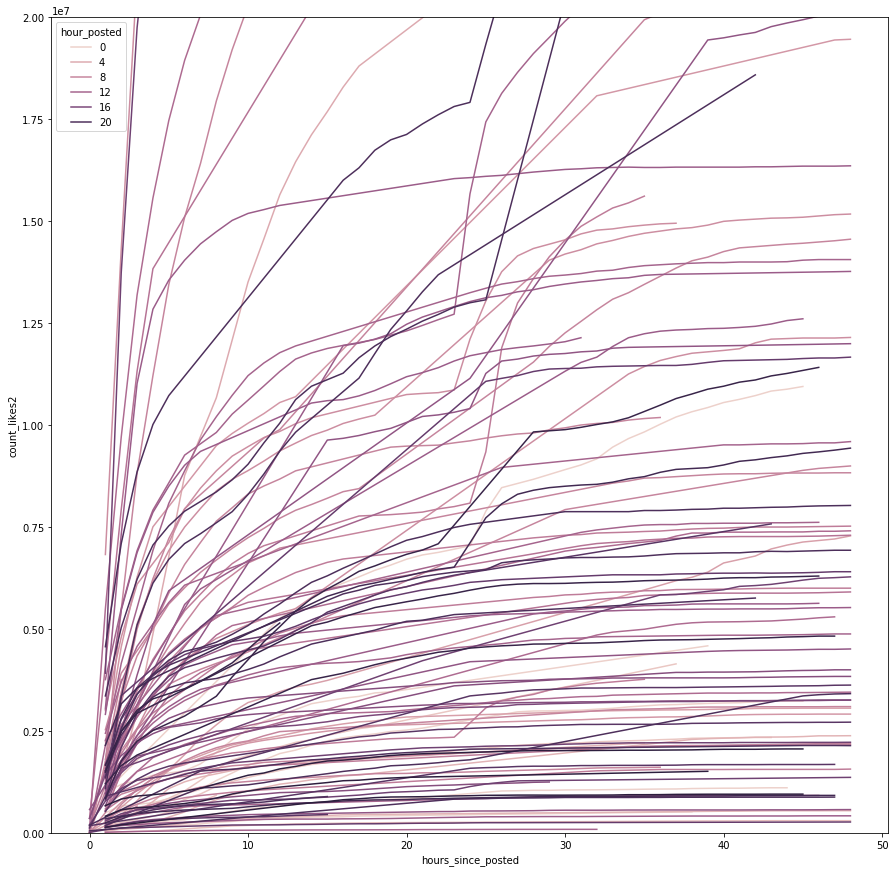

In [55]:
plt.figure(figsize=(15, 15))
plt.ylim((0, 2e7))
sns.lineplot(data=dff.query('hours_since_posted <= 48').sort_values(by='hours_since_posted'), 
             x='hours_since_posted', y='count_likes2', units='id', hue='hour_posted', estimator=None)


In [ ]:
df.to_pickle()

In [123]:
dff[['id','days_since_posted']]

,id,days_since_posted
0,592012,0 days
18472,592012,1 days
36937,592526,0 days
36938,592503,0 days
36951,592012,2 days
55416,592815,0 days
55417,592796,0 days
55418,592775,0 days
55426,592526,1 days
55427,592503,1 days


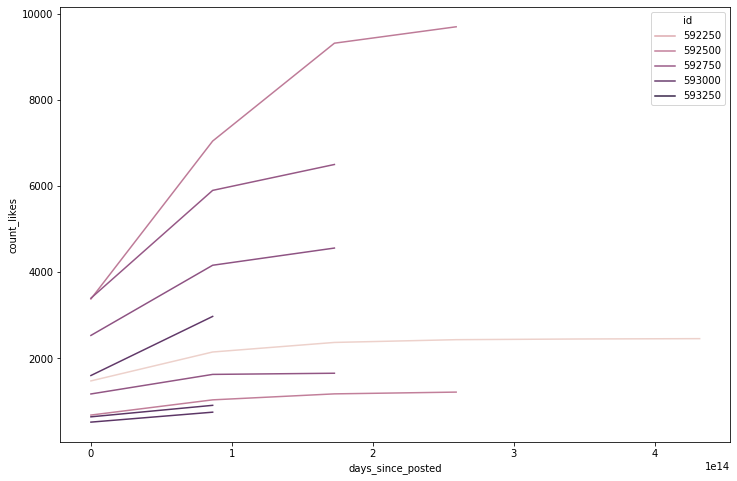

In [120]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=dff, x="days_since_posted", y="count_likes", hue="id")

In [19]:
for i in dfs:
    df = .dropna(subset=['url'])
    df['post_url'] = 'https://vk.com/wall-45745333_' + df['id'].astype(str)


ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

In [ ]:
df = pd.read_table('4ch_-45745333_20220124_115736.tsv', parse_dates=['date'])
df = df.dropna(subset=['url'])
df['post_url'] = 'https://vk.com/wall-45745333_' + df['id'].astype(str)

df['dayofweek'] = df['date'].dt.dayofweek
df['weekend'] = df['dayofweek'] > 4
for f in 'count_likes', 'count_views', 'count_comments','count_reposts':
    df[f"log_{f}"] = np.log10(df[f]+1)

In [14]:
df.shape

(80467, 16)

In [15]:
(df['count_comments'] == 0).sum()

74033

In [27]:
df['count_likes'].median()

11258.0

In [28]:
df['count_likes'].quantile(0.10)

3699.0

In [29]:
df['count_likes'].quantile(0.90)

18678.0

In [20]:
df.columns

Index(['index', 'id', 'date', 'count_likes', 'count_views', 'count_comments',
       'count_reposts', 'text', 'url'],
      dtype='object')

In [25]:
df['date'].values

array(['[2021, 11, 19, 22, 22, 31, 0, 352]',
       '[2021, 11, 19, 20, 16, 31, 0, 352]',
       '[2021, 11, 19, 18, 2, 54, 0, 352]', ...,
       '[2013, 11, 21, 21, 15, 4, 6, 354]',
       '[2013, 11, 21, 21, 0, 27, 6, 354]',
       '[2013, 11, 21, 20, 47, 53, 6, 354]'], dtype=object)

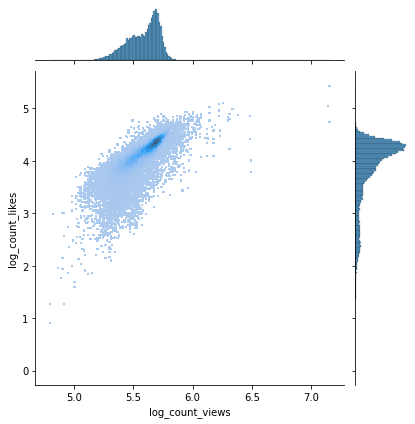

In [22]:
sns.jointplot(data=df,x='log_count_views', y='log_count_likes',kind="hist", height=6)
plt.show()

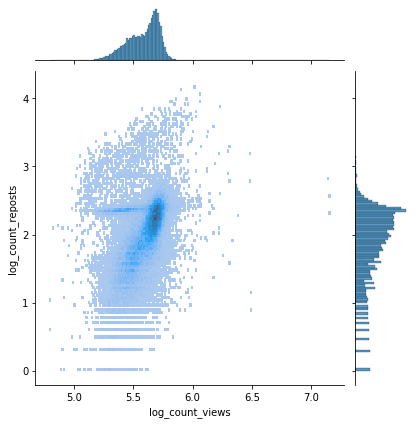

In [31]:
sns.jointplot(data=df,x='log_count_views', y='log_count_reposts',kind="hist", height=6)
plt.show()

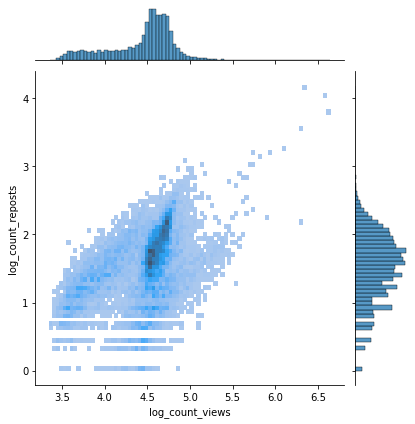

In [65]:
sns.jointplot(data=df,x='log_count_views', y='log_count_reposts',kind="hist", height=6)
plt.show()

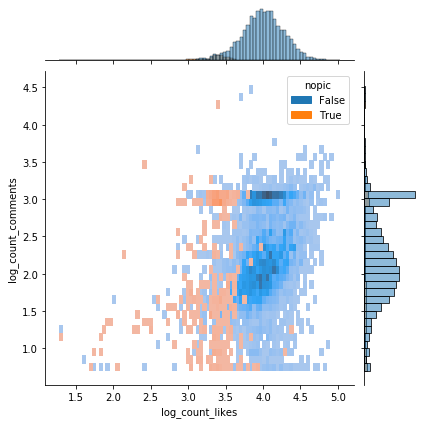

In [62]:
sns.jointplot(data=df.query('count_comments > 3'), 
              x='log_count_likes', y='log_count_comments',kind="hist", hue='nopic', height=6)
plt.show()

In [55]:
df_hash = df.query('count_comments > 1000 & text.notna() & text.str.contains("#")')

In [56]:
df_hash.shape

(18, 15)

In [52]:
list(map(lambda x: x[0], df_hash['text'].str.split()))

['#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch',
 '#новостной@4ch']

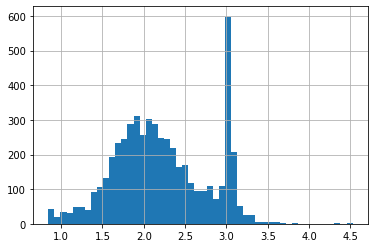

In [22]:
df.query('count_comments>5')['log_count_comments'].hist(bins=50)

In [21]:
df.query('text.notna() & text.str.contains("набер")')['text']

TypeError: 'tuple' object is not callable

In [60]:
df['nopic'] = df['url'].isna()

In [30]:
df.query('1000 < count_comments < 1100')

,index,id,date,count_likes,count_views,count_comments,count_reposts,text,url,post_url,dayofweek,weekend,log_count_likes,log_count_views,log_count_comments,log_count_reposts
1192,1193,45121801,2020-12-21 11:04:00,16339,682013.0,1043,477,NaN,https://sun1-89.userapi.com/impg/5TgEqEQatGr9Y...,https://vk.com/wall-45745333_45121801,0,False,4.213252,5.833793,3.018700,2.679428
1298,1299,44963575,2020-11-13 09:02:01,17235,841141.0,1093,53,NaN,https://sun1-30.userapi.com/impg/hSXepgMlDylQQ...,https://vk.com/wall-45745333_44963575,4,False,4.236436,5.924869,3.039017,1.732394
1328,1329,44926892,2020-11-04 15:01:00,24897,892401.0,1031,56,"пацаны, держитесь!",https://sun1-55.userapi.com/impg/lrSwlHCjwmeJ8...,https://vk.com/wall-45745333_44926892,2,False,4.396164,5.950561,3.013680,1.755875
1977,1978,44226518,2020-06-27 09:31:00,23212,558981.0,1096,301,NaN,https://sun1-83.userapi.com/impg/H4VPZDzrm962J...,https://vk.com/wall-45745333_44226518,5,True,4.365731,5.747398,3.040207,2.480007
2013,2014,44124567,2020-06-17 10:01:00,24874,754951.0,1022,172,NaN,https://sun1-55.userapi.com/impg/x_58Km2ieNg2H...,https://vk.com/wall-45745333_44124567,2,False,4.395763,5.877919,3.009876,2.238046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5392,5393,40296252,2020-01-11 18:44:00,8834,302838.0,1001,15,NaN,https://sun1-83.userapi.com/impg/iKmpJ4rpS44k3...,https://vk.com/wall-45745333_40296252,5,True,3.946207,5.481212,3.000868,1.204120
5496,5497,40100396,2020-01-05 18:46:00,11951,337363.0,1013,193,NaN,https://sun1-90.userapi.com/impg/c855724/v8557...,https://vk.com/wall-45745333_40100396,6,True,4.077441,5.528099,3.006038,2.287802
5597,5598,39899035,2019-12-31 11:29:00,7413,229104.0,1002,14,NaN,https://sun1-28.userapi.com/impg/c855024/v8550...,https://vk.com/wall-45745333_39899035,1,False,3.870053,5.360035,3.001301,1.176091
5649,5650,39807352,2019-12-29 13:14:00,5150,220180.0,1028,10,NaN,https://sun1-97.userapi.com/impg/ksHFh0j7y4yEp...,https://vk.com/wall-45745333_39807352,6,True,3.711892,5.342780,3.012415,1.041393


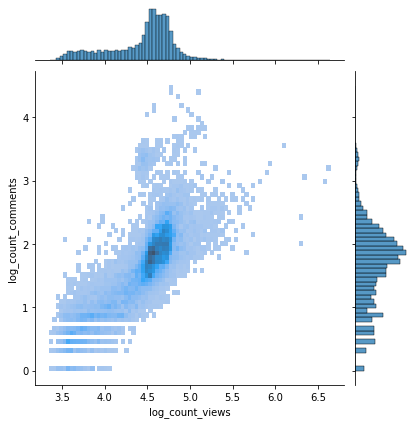

In [66]:
sns.jointplot(data=df,x='log_count_views', y='log_count_comments',kind="hist", height=6)
plt.show()

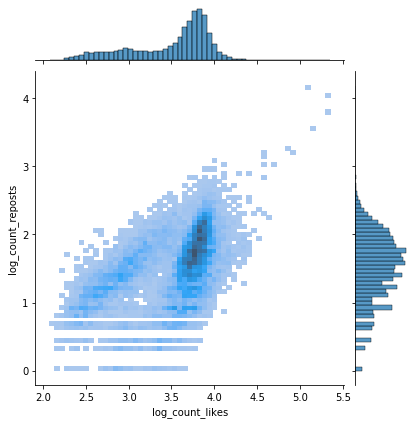

In [67]:
sns.jointplot(data=df,x='log_count_likes', y='log_count_reposts',kind="hist", height=6)
plt.show()

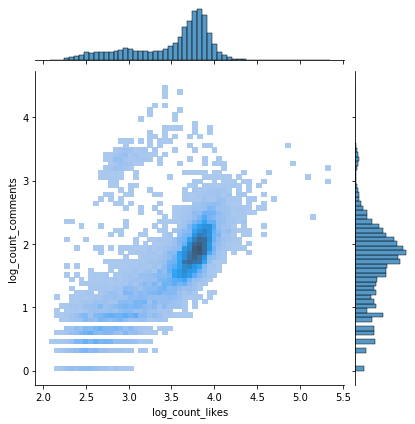

In [68]:
sns.jointplot(data=df,x='log_count_likes', y='log_count_comments',kind="hist", height=6)
plt.show()

<Figure size 864x576 with 0 Axes>

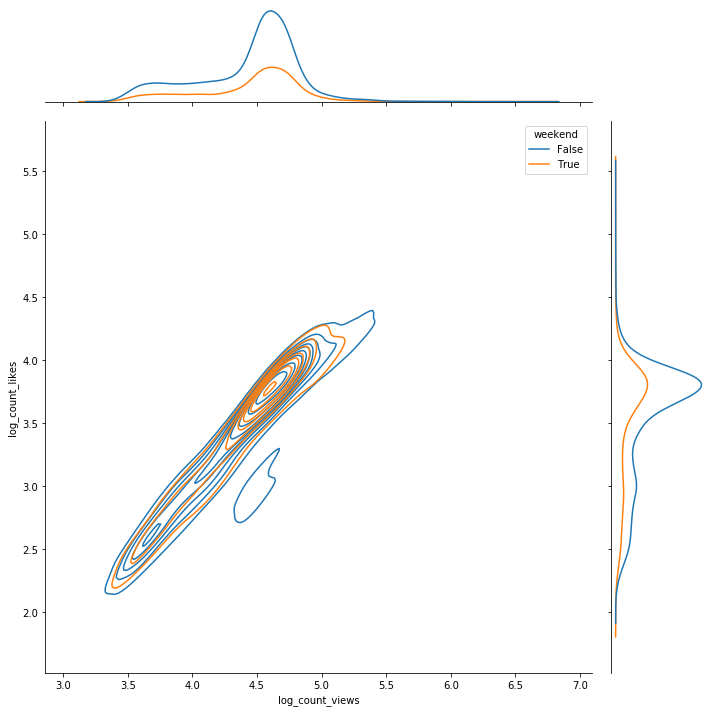

In [79]:
plt.figure(figsize=(12, 8))
sns.jointplot(data=df,x='log_count_views', y='log_count_likes', hue='weekend', kind="kde", height=10)
plt.show()

### По графику видно, как изначально сообщество резко начинало повышать свою популярность, но затем в какое-то время сообщество практически перестало быть активным, а затем в последнее время началась движуха небольшая

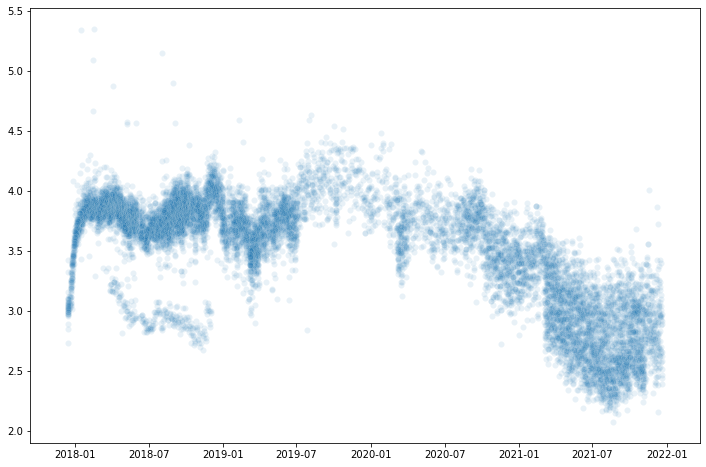

In [92]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['date'].values, y=df['log_count_likes'].values, alpha=0.1)

### Замечания

In [ ]:
# TODO
# Многие посты рекламные, несмотря на то, что marked_as_ads = 0
# надо как-то отфильтровать

# Примеры:
# https://vk.com/wall-165633206_207799
# https://vk.com/wall-165633206_203413


# https://vk.com/wall-165633206_213968 должен возвращать 404
# https://vk.com/3ddcomics - здесь возвращает 404 норм

# api.wall.getComments(owner_id='-45745333', post_id='39899035') #здесь странный пост - тысячи комментов вдруг

# для красивого формата
# import pprint
# pprint.pprint(res)

In [71]:
# на память - образец удаленного поста с сохраненной информацией
df.iloc[0]

index                                                             1
id                                                         46030216
date                                            2021-12-19 22:22:31
count_likes                                                    2552
count_views                                                  129911
count_comments                                                   16
count_reposts                                                   631
text                                                            NaN
url               https://sun1-54.userapi.com/impg/qg-3peeeHKcP3...
post_url                      https://vk.com/wall-45745333_46030216
Name: 0, dtype: object

### Ниже неактуальная ячейка

In [7]:
# когда-то хранил целиком все сообщества в одном словаре сразу в двух пиклах

a_file1 = open("data.pkl", "rb")
res_dicts_comms1 = pickle.load(a_file1)
a_file2 = open("data2.pkl", "rb")
res_dicts_comms2 = pickle.load(a_file2)
print(len(res_dicts_comms1))
list(res_dicts_comms2.keys())

# объединяем
res_dicts_comms = dict(res_dicts_comms1)
res_dicts_comms.update(res_dicts_comms2)

len(res_dicts_comms.keys())
res_dicts_comms.keys()

#функция для переименовывания (названий сообществ + id)
def rename(cur_dict, key, new_key):
    ind = list(cur_dict.keys()).index(key)
    list(cur_dict.keys())[ind] = new_key
    cur_dict[new_key] = cur_dict[key]
    del cur_dict[key]
    
for i in list(res_dicts_comms.keys()):
    new_key = i[9:]
    old_key = i
    rename(res_dicts_comms, old_key, new_key)
    #res_dicts_comms[new_key] = res_dicts_comms.pop(old_key)
    
res_dicts_comms.keys()

# и раньше я хранил все сообщества в одном словаре и сразу все переводид в tsv.
# Потом от идей отказался

for i in res_dicts_comms.keys():
    cur_df = load_to_df(res_dicts_comms[i])
    now_time_comm = res_dicts_comms[i]['now_time']
    strp_time = dt.strptime(now_time_comm, '%Y-%m-%d %H:%M:%S.%f')
    cur_time = strp_time.strftime("%Y%m%d_%H%M%S")
    own_id = proba_res_comm['items'][0]['owner_id']
    cur_df.to_csv(f'{i}_{own_id}_{cur_time}.tsv', sep='\t')
    #res_dicts_comms[f'res_dict_{name_c}'] = parse_posts_community(name_c)
    
# это идея была предназначена для того, чтобы в существующих tsv файлах можно было добавить один столбец hid_comments 
# (до тех пор пока не стал фильтровать при следующих обкачках)
df = pd.read_table('3ddcomics_-165633206_20211220_133019.tsv', parse_dates=['date'])
posts_id = jq.compile('.items[].id').input(res_dicts_comms).all()
own_id = res_dicts_comms['items'][0]['owner_id']
df = df.dropna(subset=['url'])
df['post_url'] = 'https://vk.com/wall' + str(own_id) + '_' + df['id'].astype(str)
for post_id in posts_id:
    time.sleep(1)
    try:
        comments = api.wall.getComments(owner_id=own_id, post_id=post_id)
        df['hid_coms'] = True if comments['items'] == [] and comments['count'] > 0 else False
    except:
        print('https://vk.com/wall' + str(own_id) + '_' + str(post_id))
    
# api.wall.getById(posts=[f'{own_id}_{post_id}'])

# humor_schrodinger_20211227_055441.tsv